In [1]:
import richdem as rd
import numpy as np

In [4]:
img = np.load('/Users/sbhadra/GIS5120/lectures/drainage/beauford.npz')

In [7]:
img = img['beauford']

In [8]:
beau = rd.rdarray(img, no_data=-9999)

In [11]:
beau

rdarray([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
         [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
         [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
         ...,
         [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
         [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
         [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
        dtype=float32)

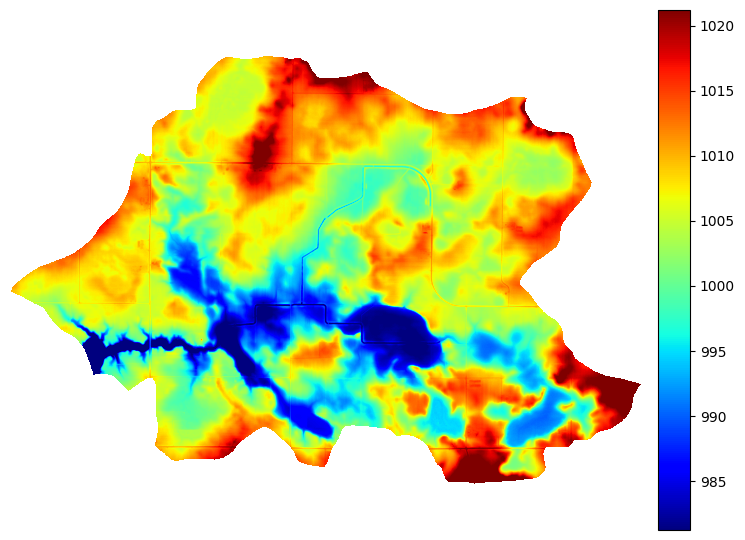

In [14]:
beaufig = rd.rdShow(beau, ignore_colours=[0], axes=False, cmap='jet', figsize=(8,5.5))

In [13]:
beau_filled = rd.FillDepressions(beau, in_place=False)

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A Priority-Flood (Zhou2016 version)
C Zhou, G., Sun, Z., Fu, S., 2016. An efficient variant of the Priority-Flood algorithm for filling depressions in raster digital elevation models. Computers & Geosciences 90, Part A, 87 – 96. doi:http://dx.doi.org/10.1016/j.cageo.2016.02.021

t Zhou2016 wall-time = 0.203503 s


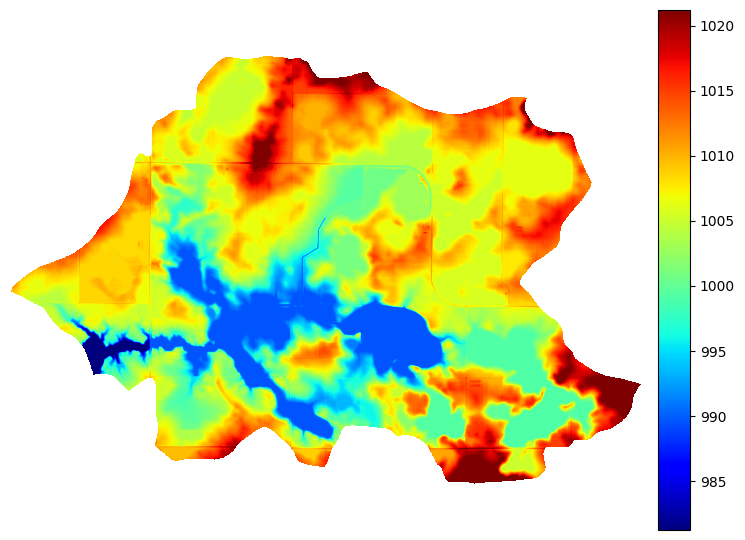

In [15]:
beaufig_filled = rd.rdShow(beau_filled, ignore_colours=[0], axes=False, cmap='jet', vmin=beaufig['vmin'], vmax=beaufig['vmax'], figsize=(8,5.5))

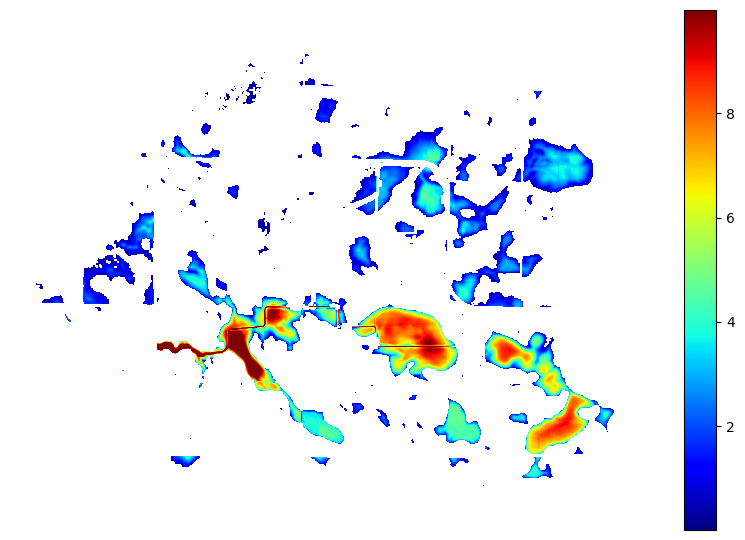

In [16]:
beau_diff    = beau_filled - beau
beaufig_diff = rd.rdShow(beau_diff, ignore_colours=[0], axes=False, cmap='jet', figsize=(8,5.5))

In [20]:
elev = np.array([
    [78, 72, 69, 71, 58, 49],
    [74, 67, 56, 49, 46, 50],
    [69, 53, 44, 37, 38, 48],
    [64, 58, 55, 22, 31, 24],
    [68, 61, 47, 21, 16, 19],
    [74, 53, 34, 12, 11, 12]
])

In [21]:
rd_elev = rd.rdarray(elev, no_data=-9999)
rd_elev.projection = 'EPSG:4326'

In [22]:
dinf_flow_dir = rd.FlowDirectionDInfinity(rd_elev)

AttributeError: module 'richdem' has no attribute 'FlowDirectionDInfinity'

In [23]:
accum_dinf = rd.FlowAccumulation(rd_elev, method='Dinf')

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A Tarboton (1997) Flow Accumulation (aka D-Infinity, D∞)
C Tarboton, D.G., 1997. A new method for the determination of flow directions and upslope areas in grid digital elevation models. Water resources research 33, 309–319.

[==================================================] (100% - 0.0s - 1 threads)
A Generic Flow Accumulation Algorithm
p Creating dependencies array...

d Source cells found = 25
p Calculating flow accumulation...
t Wall-time       = 0.000494541 s=============] (100% - 0.0s - 1 threads)


In [26]:
accum_d8 = rd.FlowAccumulation(rd_elev, method='D8')

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A O'Callaghan (1984)/Marks (1984) D8/D4 Flow Accumulation
C O'Callaghan, J.F., Mark, D.M., 1984. The Extraction of Drainage Networks from Digital Elevation Data. Computer vision, graphics, and image processing 28, 323--344.

c topology = D8
[==================================================] (100% - 0.0s - 1 threads)
A Generic Flow Accumulation Algorithm
p Creating dependencies array...

d Source cells found = 28
p Calculating flow accumulation...
t Wall-time       = 0.000404375 s=============] (100% - 0.0s - 1 threads)


In [25]:
accum_dinf

rdarray([[ 1.        ,  1.        ,  1.        ,  1.        ,
           1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ,  1.        ,
           1.        ,  1.        ],
         [ 1.        ,  1.72744942,  4.67236522,  3.169301  ,
           1.1583337 ,  1.        ],
         [ 1.        ,  1.        ,  1.        , 10.03857114,
           1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.95286453,  2.7900288 ,
          12.03857114,  1.        ],
         [ 1.        ,  1.        ,  1.04713549,  2.51736028,
          15.43550413,  1.        ]])

In [27]:
accum_d8

rdarray([[ 1.,  1.,  1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.,  1.,  1.],
         [ 1.,  1.,  4.,  4.,  1.,  1.],
         [ 1.,  1.,  1., 10.,  1.,  1.],
         [ 1.,  1.,  1.,  2., 12.,  1.],
         [ 1.,  1.,  2.,  2., 15.,  1.]])

In [31]:
d8 = rd.FlowProportions(rd_elev, method='D8')

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A O'Callaghan (1984)/Marks (1984) D8/D4 Flow Accumulation
C O'Callaghan, J.F., Mark, D.M., 1984. The Extraction of Drainage Networks from Digital Elevation Data. Computer vision, graphics, and image processing 28, 323--344.

c topology = D8
[==================================================] (100% - 0.0s - 1 threads)

In [34]:
d8[1]

rd3array([[-1., -1., -1., -1., -1., -1., -1., -1., -1.],
          [ 0., -1., -1., -1., -1., -1.,  1., -1., -1.],
          [ 0., -1., -1., -1., -1., -1.,  1., -1., -1.],
          [ 0., -1., -1., -1., -1., -1., -1.,  1., -1.],
          [ 0., -1., -1., -1., -1., -1., -1., -1.,  1.],
          [-1., -1., -1., -1., -1., -1., -1., -1., -1.]], dtype=float32)